## **Salary Predictions of Data Professions**

In [58]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import pickle
import lazypredict

In [59]:
#loading the dataset
df = pd.read_csv('Salary Prediction of Data Professions.csv')
df

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,6-28-2011,01-07-2016,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2635,LOUISE,ALTARAS,F,1-14-2014,01-07-2016,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2636,RENEE,ALVINO,F,1-23-2014,01-07-2016,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2637,TERI,ANASTASIO,F,3-17-2014,01-07-2016,Analyst,24.0,45172,Web,23.0,7.0,3.0,1


In [60]:
df.UNIT.value_counts()

UNIT
IT            461
Finance       446
Operations    438
Marketing     438
Web           431
Management    425
Name: count, dtype: int64

# Data cleaning

In [61]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
2,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
3,ELLIOT,AGULAR,M,09-02-2013,01-07-2016,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0
4,KATHY,ALSOP,F,6-29-2014,01-07-2016,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2626,KATHERINE,ALSDON,F,6-28-2011,01-07-2016,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2627,LOUISE,ALTARAS,F,1-14-2014,01-07-2016,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2628,RENEE,ALVINO,F,1-23-2014,01-07-2016,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2629,TERI,ANASTASIO,F,3-17-2014,01-07-2016,Analyst,24.0,45172,Web,23.0,7.0,3.0,1


In [62]:
df.duplicated().sum()

161

In [63]:
df.drop_duplicates(inplace=True, ignore_index=True)
df

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
2,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
3,ELLIOT,AGULAR,M,09-02-2013,01-07-2016,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0
4,KATHY,ALSOP,F,6-29-2014,01-07-2016,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2465,KATHERINE,ALSDON,F,6-28-2011,01-07-2016,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2466,LOUISE,ALTARAS,F,1-14-2014,01-07-2016,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2467,RENEE,ALVINO,F,1-23-2014,01-07-2016,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2468,TERI,ANASTASIO,F,3-17-2014,01-07-2016,Analyst,24.0,45172,Web,23.0,7.0,3.0,1


In [64]:
df.to_csv('Salary Prediction of Data Professions_cleaned.csv', index=False)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2470 entries, 0 to 2469
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2470 non-null   object 
 1   LAST NAME         2470 non-null   object 
 2   SEX               2470 non-null   object 
 3   DOJ               2470 non-null   object 
 4   CURRENT DATE      2470 non-null   object 
 5   DESIGNATION       2470 non-null   object 
 6   AGE               2470 non-null   float64
 7   SALARY            2470 non-null   int64  
 8   UNIT              2470 non-null   object 
 9   LEAVES USED       2470 non-null   float64
 10  LEAVES REMAINING  2470 non-null   float64
 11  RATINGS           2470 non-null   float64
 12  PAST EXP          2470 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 251.0+ KB


## CONVERTING DATA AND CLASSIFYING 

In [66]:
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'])

In [67]:
df.describe()

,DOJ,CURRENT DATE,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2470,2470,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000
mean,2013-10-29 17:07:14.331983616,2016-01-07 00:00:00,24.725506,58055.764777,22.490688,7.509312,3.482186,1.555870
min,2009-01-23 00:00:00,2016-01-07 00:00:00,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,2013-05-05 06:00:00,2016-01-07 00:00:00,22.000000,43401.250000,19.000000,4.000000,2.000000,0.000000
50%,2013-12-07 00:00:00,2016-01-07 00:00:00,24.000000,46737.500000,22.000000,8.000000,3.000000,1.000000
75%,2014-07-11 00:00:00,2016-01-07 00:00:00,25.000000,50323.750000,26.000000,11.000000,4.000000,2.000000
max,2015-01-31 00:00:00,2016-01-07 00:00:00,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000
std,NaN,NaN,3.908838,36776.484770,4.597236,4.597236,1.115217,2.703656


In [68]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

print(f'Categorical Columns: {categorical_cols}')
print(f'Numerical Columns: {numerical_cols}')
print(f'Datetime Columns: {datetime_cols}')


Categorical Columns: ['FIRST NAME', 'LAST NAME', 'SEX', 'DESIGNATION', 'UNIT']
Numerical Columns: ['AGE', 'SALARY', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP']
Datetime Columns: ['DOJ', 'CURRENT DATE']


## Exploratory Data Analysis (EDA)

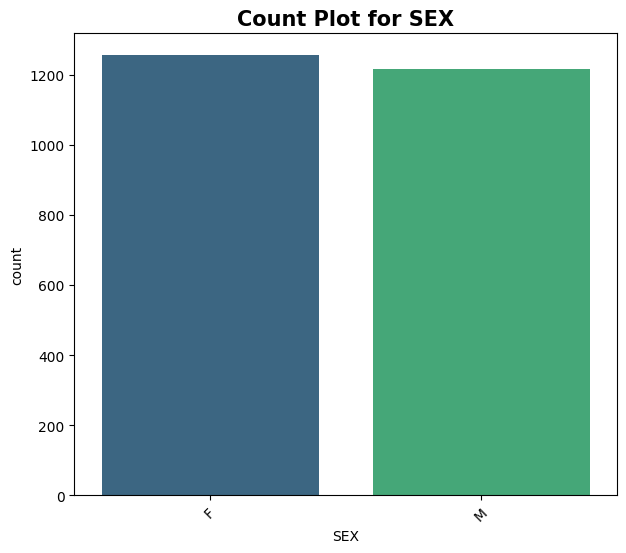

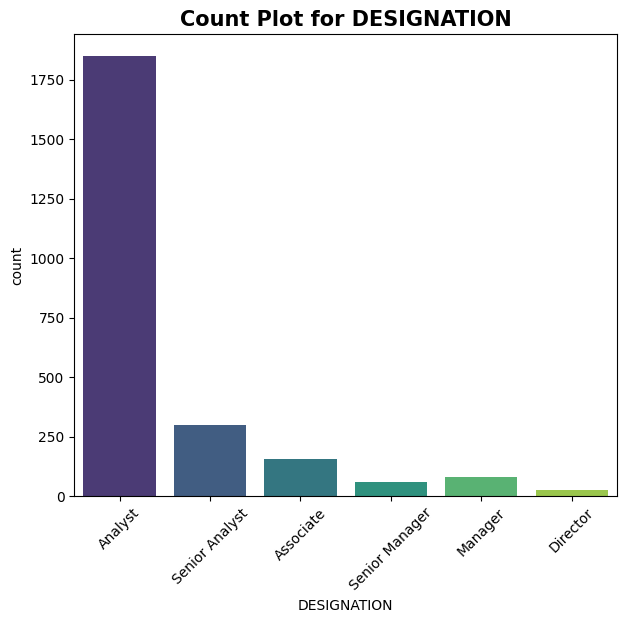

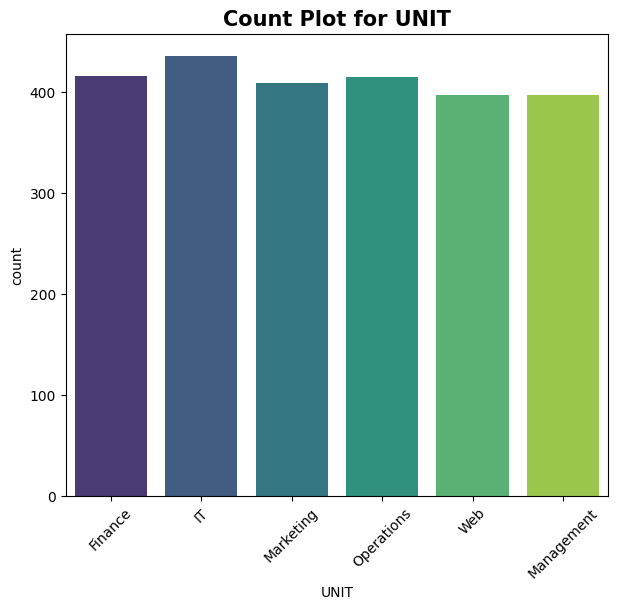

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

categorical_cols = ['SEX', 'DESIGNATION', 'UNIT']
for col in categorical_cols:
    plt.figure(figsize=(7, 6))
    sns.countplot(x=col, data=df, palette='viridis',hue = col)
    plt.title(f'Count Plot for {col}', fontsize=15, fontweight='bold')
    plt.xticks(rotation=45)

    
    plt.show()


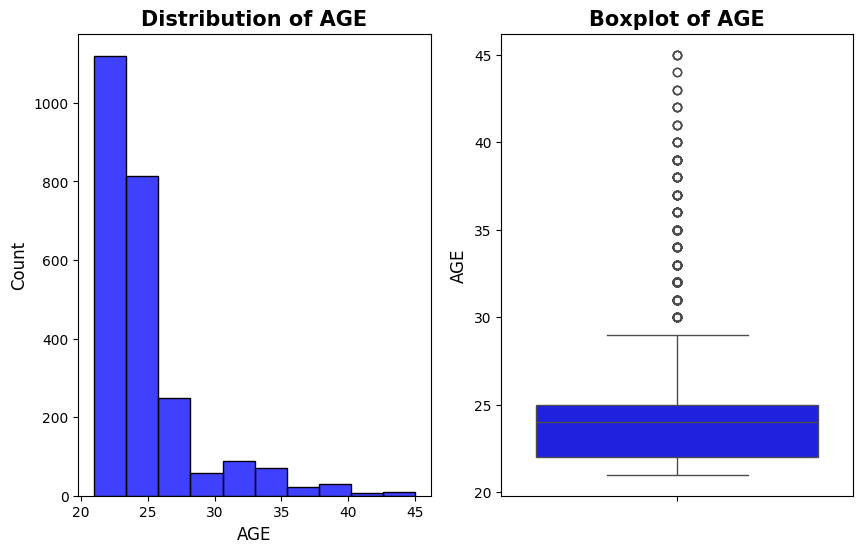

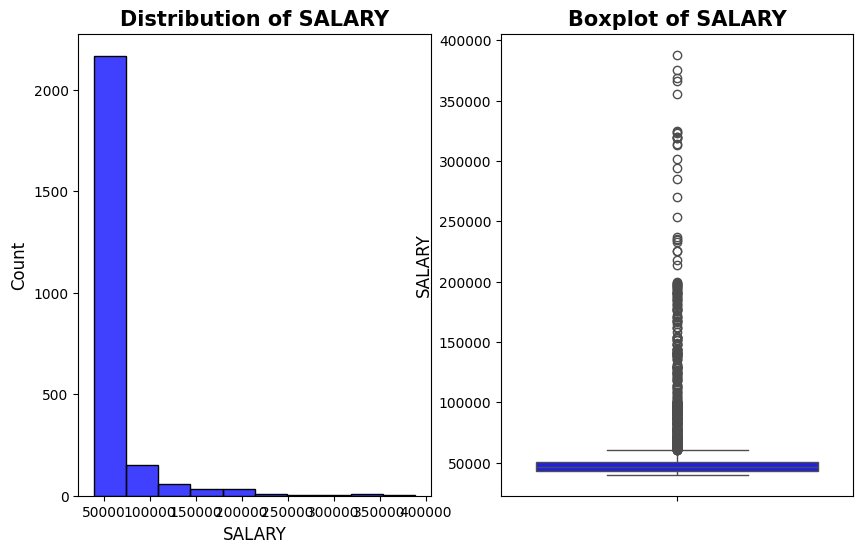

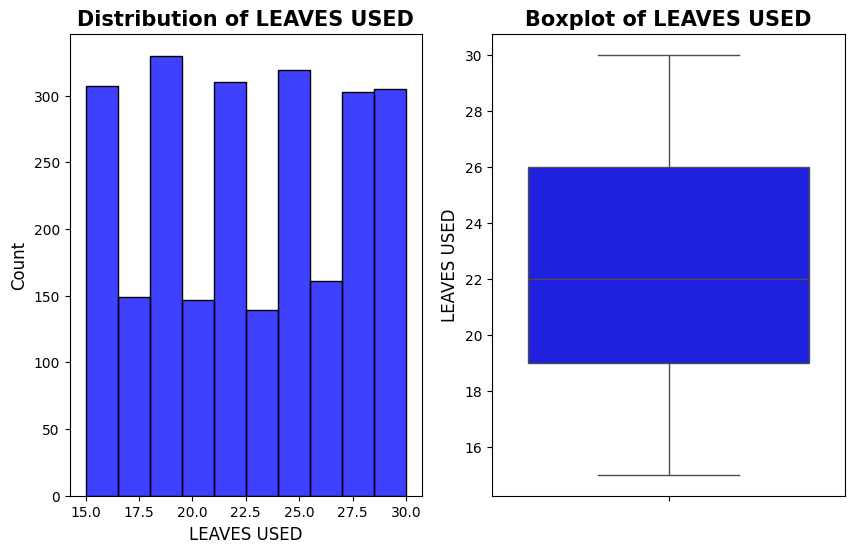

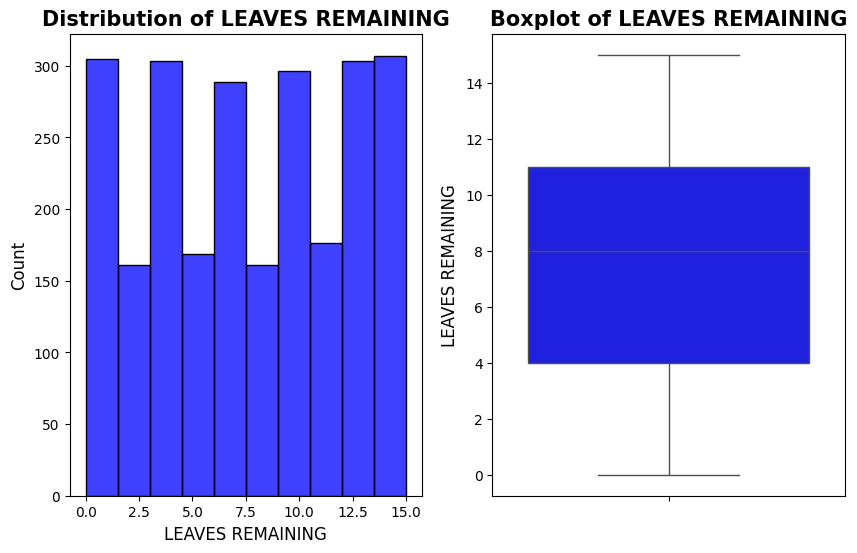

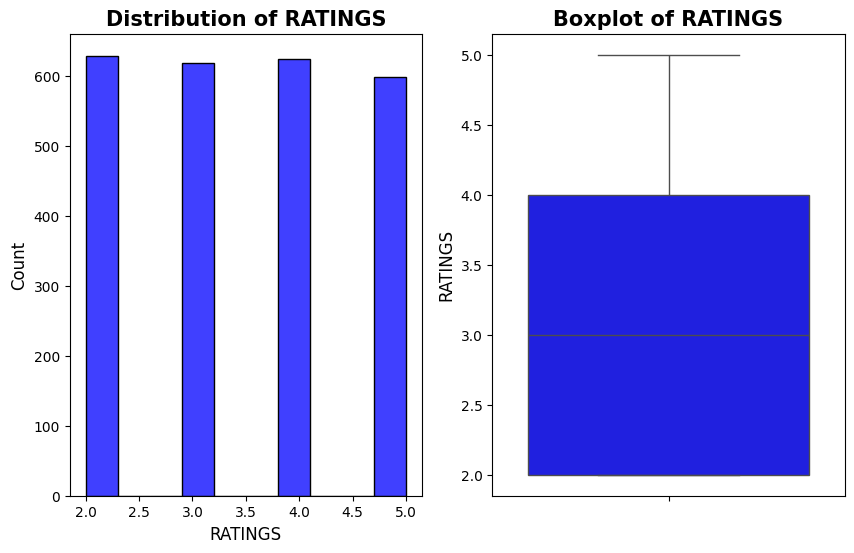

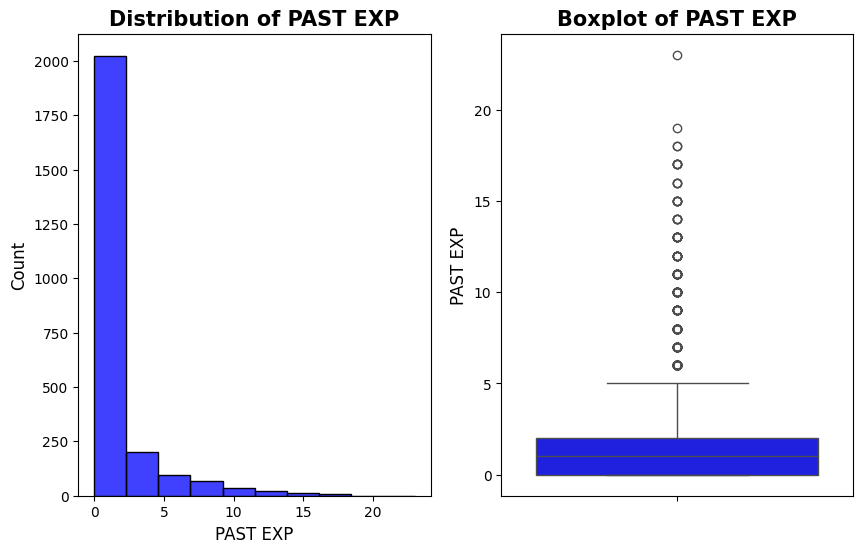

In [70]:
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    plt.subplot(1,2,1)
    sns.histplot(df[col], color='blue',bins = 10)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'Distribution of {col}', fontsize=15, fontweight='bold')
    
    plt.subplot(1,2,2)
    sns.boxplot(y=df[col], color='blue')
    plt.ylabel(col, fontsize=12)
    plt.title(f'Boxplot of {col}', fontsize=15, fontweight='bold')

In [71]:
df

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
2,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
3,ELLIOT,AGULAR,M,2013-09-02,2016-01-07,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0
4,KATHY,ALSOP,F,2014-06-29,2016-01-07,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2465,KATHERINE,ALSDON,F,2011-06-28,2016-01-07,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2466,LOUISE,ALTARAS,F,2014-01-14,2016-01-07,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2467,RENEE,ALVINO,F,2014-01-23,2016-01-07,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2468,TERI,ANASTASIO,F,2014-03-17,2016-01-07,Analyst,24.0,45172,Web,23.0,7.0,3.0,1


In [73]:
df.describe()

,DOJ,CURRENT DATE,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2470,2470,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000
mean,2013-10-29 17:07:14.331983616,2016-01-07 00:00:00,24.725506,58055.764777,22.490688,7.509312,3.482186,1.555870
min,2009-01-23 00:00:00,2016-01-07 00:00:00,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,2013-05-05 06:00:00,2016-01-07 00:00:00,22.000000,43401.250000,19.000000,4.000000,2.000000,0.000000
50%,2013-12-07 00:00:00,2016-01-07 00:00:00,24.000000,46737.500000,22.000000,8.000000,3.000000,1.000000
75%,2014-07-11 00:00:00,2016-01-07 00:00:00,25.000000,50323.750000,26.000000,11.000000,4.000000,2.000000
max,2015-01-31 00:00:00,2016-01-07 00:00:00,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000
std,NaN,NaN,3.908838,36776.484770,4.597236,4.597236,1.115217,2.703656


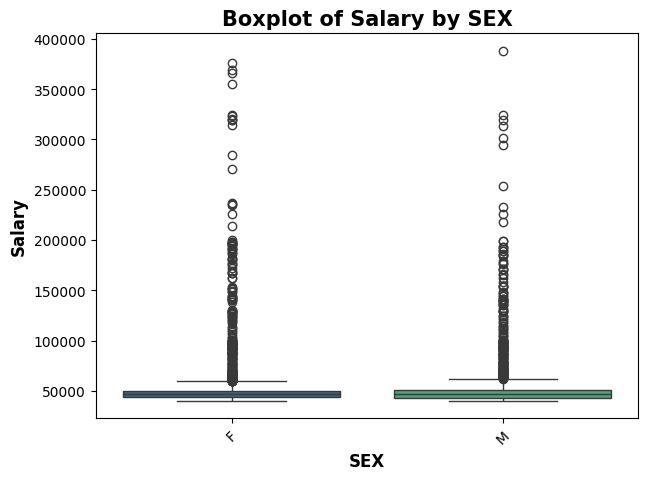

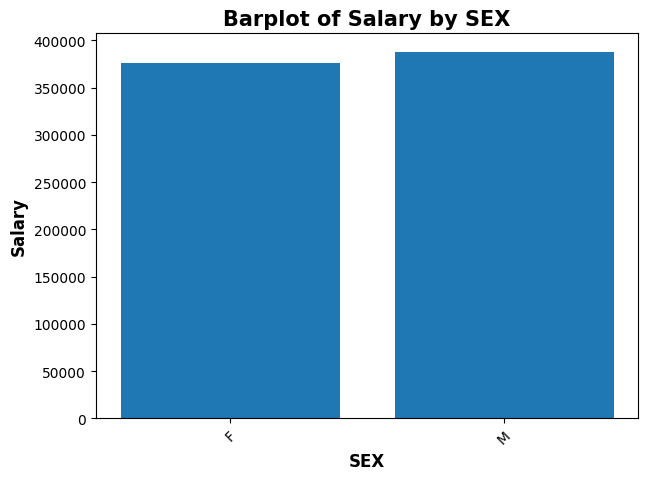

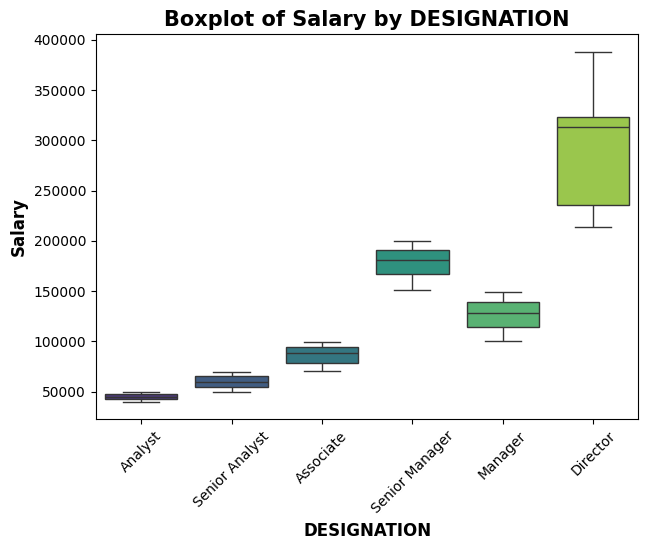

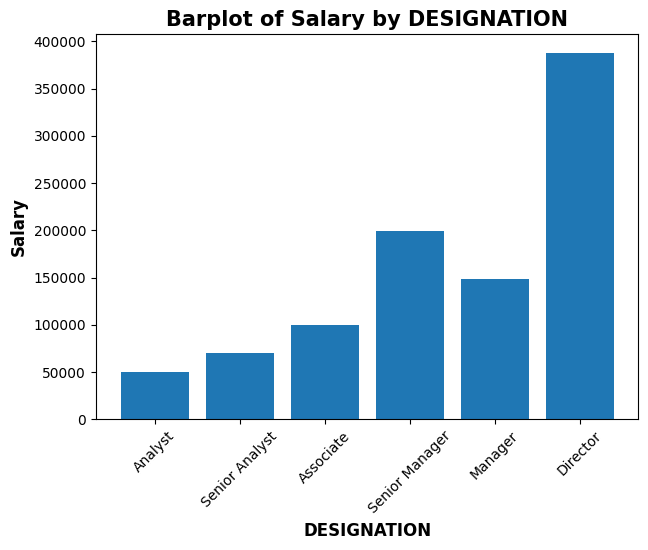

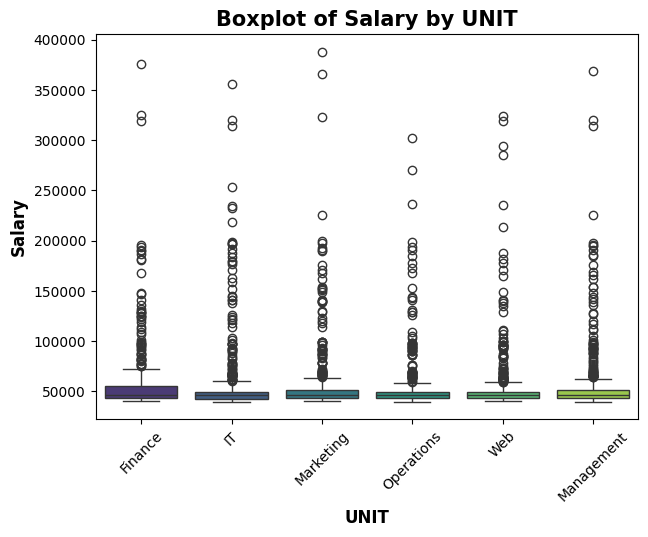

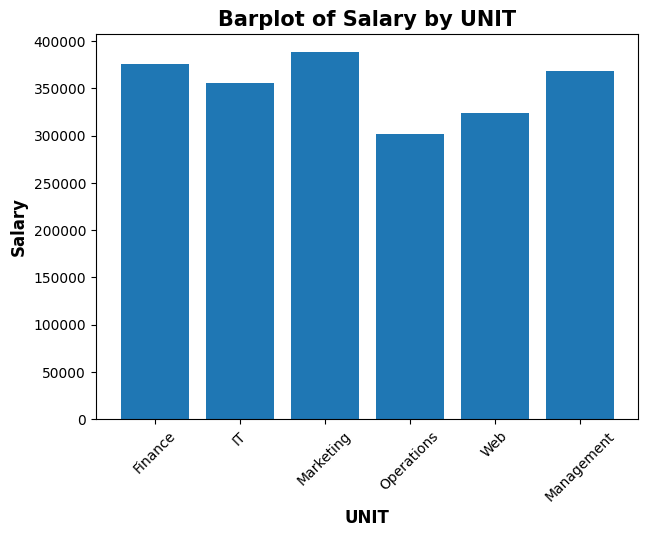

In [74]:
for col in categorical_cols:
    plt.figure(figsize=(7, 5))
    
    sns.boxplot(x=col, y='SALARY', data=df, palette='viridis',hue = col)
    plt.xlabel(col, fontsize=12, fontweight='bold')
    plt.ylabel('Salary', fontsize=12, fontweight='bold')
    plt.title(f'Boxplot of Salary by {col}', fontsize=15, fontweight='bold')
    plt.xticks(rotation=45)
    

    plt.figure(figsize=(7, 5))
    plt.bar(df[col],df['SALARY'])
    plt.xlabel(col, fontsize=12, fontweight='bold')
    plt.ylabel('Salary', fontsize=12, fontweight='bold')
    plt.title(f'Barplot of Salary by {col}', fontsize=15, fontweight='bold')
    plt.xticks(rotation=45)
    plt.show()
    


**VISUALIZING THE DISTRIBUTION OF THE LABEL**

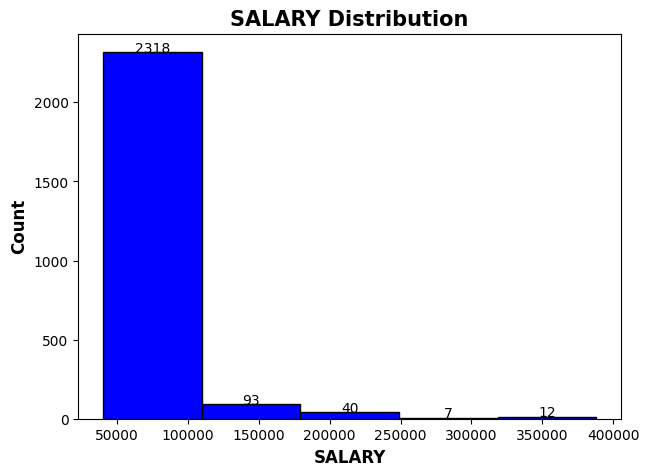

In [75]:
plt.figure(figsize=(7, 5))
n, bins, _  = plt.hist(df['SALARY'], bins = 5, color = 'blue',edgecolor = 'black')
plt.xlabel('SALARY', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('SALARY Distribution', fontsize=15, fontweight='bold')
for i in range(5):
    plt.text((bins[i] + bins[i + 1]) / 2, n[i], 
             str(int(n[i])), ha='center')


## CONVERTING DATA TO DESCRIPTORS


In [76]:
df

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
2,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
3,ELLIOT,AGULAR,M,2013-09-02,2016-01-07,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0
4,KATHY,ALSOP,F,2014-06-29,2016-01-07,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2465,KATHERINE,ALSDON,F,2011-06-28,2016-01-07,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2466,LOUISE,ALTARAS,F,2014-01-14,2016-01-07,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2467,RENEE,ALVINO,F,2014-01-23,2016-01-07,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2468,TERI,ANASTASIO,F,2014-03-17,2016-01-07,Analyst,24.0,45172,Web,23.0,7.0,3.0,1


In [77]:
df_new = df.drop(['FIRST NAME', 'LAST NAME'], axis=1)
df_new

,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
2,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
3,M,2013-09-02,2016-01-07,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0
4,F,2014-06-29,2016-01-07,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2465,F,2011-06-28,2016-01-07,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2466,F,2014-01-14,2016-01-07,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2467,F,2014-01-23,2016-01-07,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2468,F,2014-03-17,2016-01-07,Analyst,24.0,45172,Web,23.0,7.0,3.0,1


In [78]:
df_new = pd.get_dummies(df_new,dtype='int64')
df_new

,DOJ,CURRENT DATE,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,SEX_F,SEX_M,...,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior Analyst,DESIGNATION_Senior Manager,UNIT_Finance,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web
0,2014-05-18,2016-01-07,21.0,44570,24.0,6.0,2.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,2014-07-28,2016-01-07,21.0,40955,23.0,7.0,3.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,2013-04-03,2016-01-07,22.0,45550,22.0,8.0,3.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,2013-09-02,2016-01-07,22.0,40339,19.0,11.0,5.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,2014-06-29,2016-01-07,28.0,63478,20.0,10.0,3.0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2465,2011-06-28,2016-01-07,36.0,185977,15.0,15.0,5.0,10,1,0,...,0,0,0,1,0,0,1,0,0,0
2466,2014-01-14,2016-01-07,23.0,45758,17.0,13.0,2.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2467,2014-01-23,2016-01-07,21.0,47315,29.0,1.0,5.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2468,2014-03-17,2016-01-07,24.0,45172,23.0,7.0,3.0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [79]:
df_new['DOJ_YEAR'] = df_new['DOJ'].dt.year
df_new['DOJ_MONTH'] = df_new['DOJ'].dt.month
df_new['DOJ_DAY'] = df_new['DOJ'].dt.day
df_new['DOJ_HOUR'] = df_new['DOJ'].dt.hour
df_new['DOJ_MINUTE'] = df_new['DOJ'].dt.minute
df_new['DOJ_SECOND'] = df_new['DOJ'].dt.second
df_new['CURRENT DATE_YEAR'] = df_new['CURRENT DATE'].dt.year
df_new['CURRENT DATE_MONTH'] = df_new['CURRENT DATE'].dt.month
df_new['CURRENT DATE_DAY'] = df_new['CURRENT DATE'].dt.day
df_new['CURRENT DATE_HOUR'] = df_new['CURRENT DATE'].dt.hour
df_new['CURRENT DATE_MINUTE'] = df_new['CURRENT DATE'].dt.minute
df_new['CURRENT DATE_SECOND'] = df_new['CURRENT DATE'].dt.second
df_new = df_new.drop(['DOJ', 'CURRENT DATE'], axis=1)
df_new

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,SEX_F,SEX_M,DESIGNATION_Analyst,DESIGNATION_Associate,...,DOJ_DAY,DOJ_HOUR,DOJ_MINUTE,DOJ_SECOND,CURRENT DATE_YEAR,CURRENT DATE_MONTH,CURRENT DATE_DAY,CURRENT DATE_HOUR,CURRENT DATE_MINUTE,CURRENT DATE_SECOND
0,21.0,44570,24.0,6.0,2.0,0,1,0,1,0,...,18,0,0,0,2016,1,7,0,0,0
1,21.0,40955,23.0,7.0,3.0,0,1,0,1,0,...,28,0,0,0,2016,1,7,0,0,0
2,22.0,45550,22.0,8.0,3.0,0,1,0,1,0,...,3,0,0,0,2016,1,7,0,0,0
3,22.0,40339,19.0,11.0,5.0,0,0,1,1,0,...,2,0,0,0,2016,1,7,0,0,0
4,28.0,63478,20.0,10.0,3.0,1,1,0,0,0,...,29,0,0,0,2016,1,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2465,36.0,185977,15.0,15.0,5.0,10,1,0,0,0,...,28,0,0,0,2016,1,7,0,0,0
2466,23.0,45758,17.0,13.0,2.0,0,1,0,1,0,...,14,0,0,0,2016,1,7,0,0,0
2467,21.0,47315,29.0,1.0,5.0,0,1,0,1,0,...,23,0,0,0,2016,1,7,0,0,0
2468,24.0,45172,23.0,7.0,3.0,1,1,0,1,0,...,17,0,0,0,2016,1,7,0,0,0


In [114]:
df_new[['DOJ_YEAR', 'DOJ_MONTH', 'DOJ_DAY', 'DOJ_HOUR', 'DOJ_MINUTE', 'DOJ_SECOND', 'CURRENT DATE_YEAR', 'CURRENT DATE_MONTH', 'CURRENT DATE_DAY', 'CURRENT DATE_HOUR', 'CURRENT DATE_MINUTE', 'CURRENT DATE_SECOND']] = df_new[['DOJ_YEAR', 'DOJ_MONTH', 'DOJ_DAY', 'DOJ_HOUR', 'DOJ_MINUTE', 'DOJ_SECOND', 'CURRENT DATE_YEAR', 'CURRENT DATE_MONTH', 'CURRENT DATE_DAY', 'CURRENT DATE_HOUR', 'CURRENT DATE_MINUTE', 'CURRENT DATE_SECOND']].astype('int64')

In [115]:
df_new

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,SEX_F,SEX_M,DESIGNATION_Analyst,DESIGNATION_Associate,...,DOJ_DAY,DOJ_HOUR,DOJ_MINUTE,DOJ_SECOND,CURRENT DATE_YEAR,CURRENT DATE_MONTH,CURRENT DATE_DAY,CURRENT DATE_HOUR,CURRENT DATE_MINUTE,CURRENT DATE_SECOND
0,21.00,44570,24.00,6.00,2.00,0,1,0,1,0,...,18,0,0,0,2016,1,7,0,0,0
1,21.00,40955,23.00,7.00,3.00,0,1,0,1,0,...,28,0,0,0,2016,1,7,0,0,0
2,22.00,45550,22.00,8.00,3.00,0,1,0,1,0,...,3,0,0,0,2016,1,7,0,0,0
3,22.00,40339,19.00,11.00,5.00,0,0,1,1,0,...,2,0,0,0,2016,1,7,0,0,0
4,28.00,63478,20.00,10.00,3.00,1,1,0,0,0,...,29,0,0,0,2016,1,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2465,36.00,185977,15.00,15.00,5.00,10,1,0,0,0,...,28,0,0,0,2016,1,7,0,0,0
2466,23.00,45758,17.00,13.00,2.00,0,1,0,1,0,...,14,0,0,0,2016,1,7,0,0,0
2467,21.00,47315,29.00,1.00,5.00,0,1,0,1,0,...,23,0,0,0,2016,1,7,0,0,0
2468,24.00,45172,23.00,7.00,3.00,1,1,0,1,0,...,17,0,0,0,2016,1,7,0,0,0


In [81]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2470 entries, 0 to 2469
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AGE                         2470 non-null   float64
 1   SALARY                      2470 non-null   int64  
 2   LEAVES USED                 2470 non-null   float64
 3   LEAVES REMAINING            2470 non-null   float64
 4   RATINGS                     2470 non-null   float64
 5   PAST EXP                    2470 non-null   int64  
 6   SEX_F                       2470 non-null   int64  
 7   SEX_M                       2470 non-null   int64  
 8   DESIGNATION_Analyst         2470 non-null   int64  
 9   DESIGNATION_Associate       2470 non-null   int64  
 10  DESIGNATION_Director        2470 non-null   int64  
 11  DESIGNATION_Manager         2470 non-null   int64  
 12  DESIGNATION_Senior Analyst  2470 non-null   int64  
 13  DESIGNATION_Senior Manager  2470 

## SPLITING AND TRANSFORMING THE DATASET

In [82]:
X = df_new.drop('SALARY', axis=1)
y = df_new['SALARY']

In [83]:
display(X.head(), y.head())

,AGE,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,SEX_F,SEX_M,DESIGNATION_Analyst,DESIGNATION_Associate,DESIGNATION_Director,...,DOJ_DAY,DOJ_HOUR,DOJ_MINUTE,DOJ_SECOND,CURRENT DATE_YEAR,CURRENT DATE_MONTH,CURRENT DATE_DAY,CURRENT DATE_HOUR,CURRENT DATE_MINUTE,CURRENT DATE_SECOND
0,21.0,24.0,6.0,2.0,0,1,0,1,0,0,...,18,0,0,0,2016,1,7,0,0,0
1,21.0,23.0,7.0,3.0,0,1,0,1,0,0,...,28,0,0,0,2016,1,7,0,0,0
2,22.0,22.0,8.0,3.0,0,1,0,1,0,0,...,3,0,0,0,2016,1,7,0,0,0
3,22.0,19.0,11.0,5.0,0,0,1,1,0,0,...,2,0,0,0,2016,1,7,0,0,0
4,28.0,20.0,10.0,3.0,1,1,0,0,0,0,...,29,0,0,0,2016,1,7,0,0,0


0    44570
1    40955
2    45550
3    40339
4    63478
Name: SALARY, dtype: int64

In [84]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,AGE,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,SEX_F,SEX_M,DESIGNATION_Analyst,DESIGNATION_Associate,DESIGNATION_Director,...,DOJ_DAY,DOJ_HOUR,DOJ_MINUTE,DOJ_SECOND,CURRENT DATE_YEAR,CURRENT DATE_MONTH,CURRENT DATE_DAY,CURRENT DATE_HOUR,CURRENT DATE_MINUTE,CURRENT DATE_SECOND
0,-0.953291,0.328375,-0.328375,-1.329326,-0.575586,0.983935,-0.983935,0.580155,-0.258756,-0.105128,...,0.270889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.953291,0.110809,-0.110809,-0.432458,-0.575586,0.983935,-0.983935,0.580155,-0.258756,-0.105128,...,1.417384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.697409,-0.106757,0.106757,-0.432458,-0.575586,0.983935,-0.983935,0.580155,-0.258756,-0.105128,...,-1.448855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.697409,-0.759455,0.759455,1.361279,-0.575586,-1.016328,1.016328,0.580155,-0.258756,-0.105128,...,-1.563504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.837885,-0.541889,0.541889,-0.432458,-0.205641,0.983935,-0.983935,-1.723677,-0.258756,-0.105128,...,1.532034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2465,2.884943,-1.629719,1.629719,1.361279,3.123858,0.983935,-0.983935,-1.723677,-0.258756,-0.105128,...,1.417384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2466,-0.441526,-1.194587,1.194587,-1.329326,-0.575586,0.983935,-0.983935,0.580155,-0.258756,-0.105128,...,-0.187710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2467,-0.953291,1.416205,-1.416205,1.361279,-0.575586,0.983935,-0.983935,0.580155,-0.258756,-0.105128,...,0.844136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2468,-0.185644,0.110809,-0.110809,-0.432458,-0.205641,0.983935,-0.983935,0.580155,-0.258756,-0.105128,...,0.156239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1976, 31), (494, 31), (1976,), (494,))

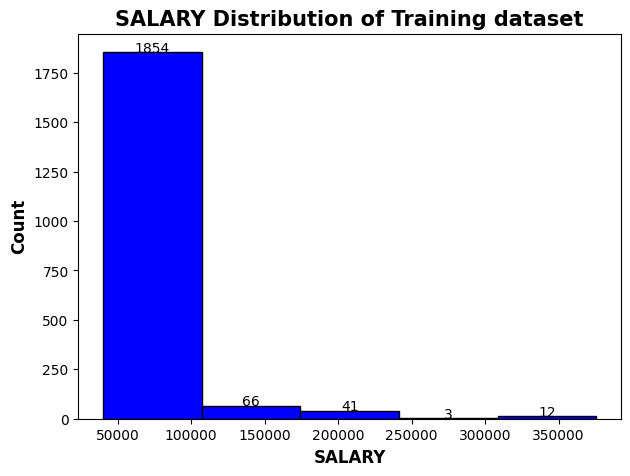

In [86]:
plt.figure(figsize=(7, 5))
n, bins, _  = plt.hist(y_train, bins = 5, color = 'blue',edgecolor = 'black')
plt.xlabel('SALARY', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('SALARY Distribution of Training dataset', fontsize=15, fontweight='bold')
for i in range(5):
    plt.text((bins[i] + bins[i + 1]) / 2, n[i], 
             str(int(n[i])), ha='center')
    

## BUILDING THE MODEL

**USING LAZYPREDICT AND COMPARING THE MODELS**

In [87]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

In [88]:
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

 71%|███████▏  | 30/42 [00:11<00:06,  1.86it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:14<00:00,  2.82it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 177
[LightGBM] [Info] Number of data points in the train set: 1976, number of used features: 22
[LightGBM] [Info] Start training from score 58000.637146


In [89]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LarsCV,0.95,0.95,7826.11,0.15
LassoLarsIC,0.95,0.95,7870.46,0.05
LassoLarsCV,0.95,0.95,7875.61,0.08
LassoCV,0.95,0.95,7875.76,0.28
RidgeCV,0.95,0.95,7916.78,0.03
Ridge,0.95,0.95,7916.78,0.03
BayesianRidge,0.95,0.95,7916.84,0.05
LassoLars,0.95,0.95,7917.28,0.04
Lasso,0.95,0.95,7917.54,0.33


In [90]:
from sklearn.linear_model import Ridge, LassoLarsCV, LassoCV, LassoLarsIC, LarsCV, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import time

**REBUILDING THE TOP 6 MODELS TO COMFIRM THE EVALUATION SCORES**

In [91]:
from sklearn.linear_model import Ridge, LassoLarsCV, LassoCV, LassoLarsIC, LarsCV, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import time


model_list = [Ridge(), LassoLarsCV(), LassoCV(), LassoLarsIC(), LarsCV(), LinearRegression()]
r2_total = []
rmse_total = []
mae_total = []
mse_total = []
time_t = []

for model in model_list:
    time_start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    time_end = time.time()
    time_taken = time_end - time_start
    time_t.append(time_taken)
    r2_total.append(r2)
    mse_total.append(mse)
    rmse_total.append(rmse)
    mae_total.append(mae)

model_performance = pd.DataFrame({'Model': ['Ridge', 'LassoLarsCV', 'LassoCV', 'LassoLarsIC', 'LarsCV', 'LinearRegression'], 'R2': r2_total, 'MSE': mse_total, 'RMSE': rmse_total, 'MAE': mae_total, 'Time Taken': time_t})
model_performance.sort_values(by='R2', ascending=False, inplace=True, ignore_index=True)


    
    
    




In [92]:
model_performance

,Model,R2,MSE,RMSE,MAE,Time Taken
0,LarsCV,0.95,61251854.54,7826.36,4065.37,0.06
1,LassoLarsCV,0.95,61298590.60,7829.34,4065.95,0.07
2,LassoLarsIC,0.95,61944049.83,7870.45,4091.66,0.02
3,LassoCV,0.95,62023015.37,7875.47,4097.23,0.27
4,LinearRegression,0.95,62359233.09,7896.79,4114.68,0.01
5,Ridge,0.95,62675530.72,7916.79,4126.12,0.02


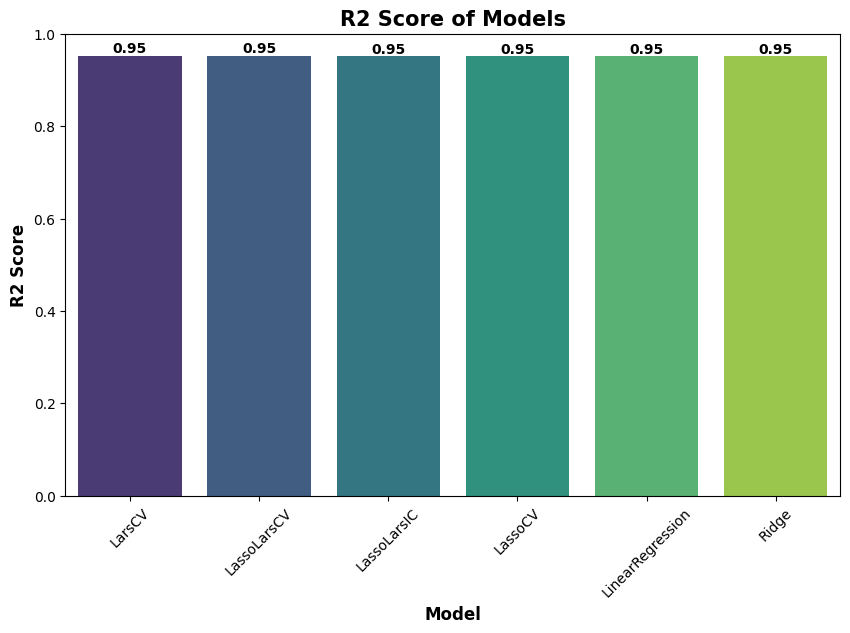

In [93]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2', data=model_performance, palette='viridis')
plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.ylabel('R2 Score', fontsize=12, fontweight='bold')
plt.title('R2 Score of Models', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
for i in range(model_performance.shape[0]):
    plt.text(i, model_performance['R2'][i], round(model_performance['R2'][i], 2), ha='center', va='bottom', fontweight='bold')
plt.show()

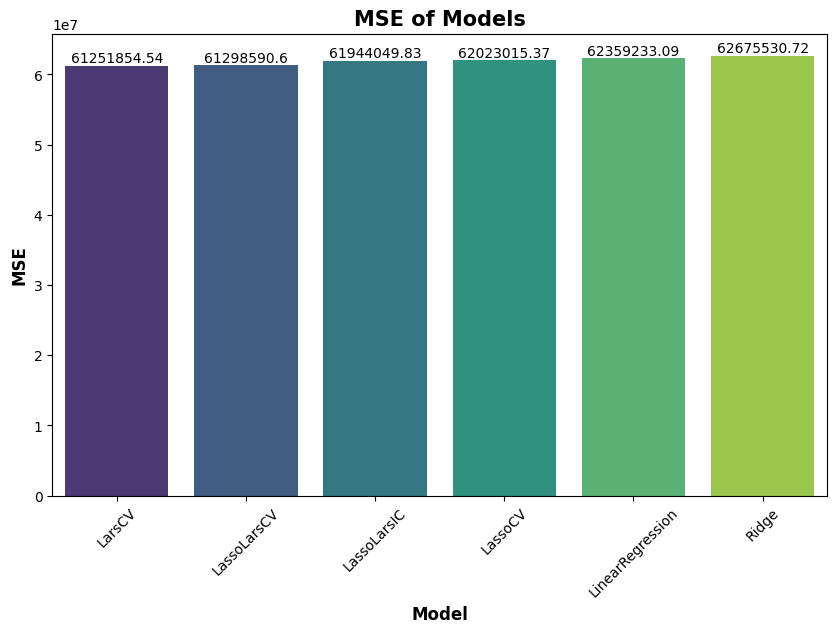

In [94]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', data=model_performance, palette='viridis')
plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.ylabel('MSE', fontsize=12, fontweight='bold')
plt.title('MSE of Models', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
for i in range(model_performance.shape[0]):
    plt.text(i, model_performance['MSE'][i], round(model_performance['MSE'][i], 2), ha='center', va='bottom')
plt.show()


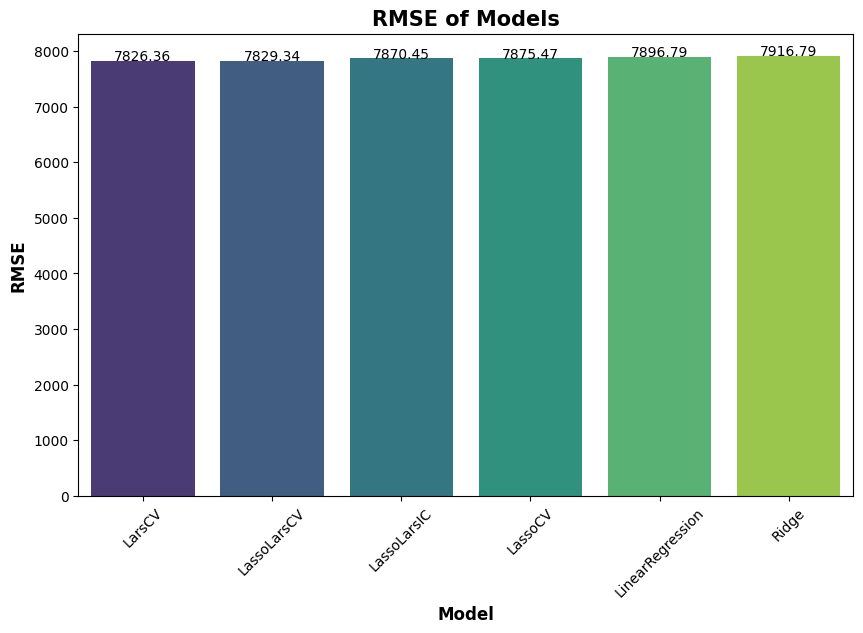

In [95]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE', data=model_performance, palette='viridis')
plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.ylabel('RMSE', fontsize=12, fontweight='bold')
plt.title('RMSE of Models', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
for i in range(model_performance.shape[0]):
    plt.text(i, model_performance['RMSE'][i], round(model_performance['RMSE'][i], 2), ha='center')

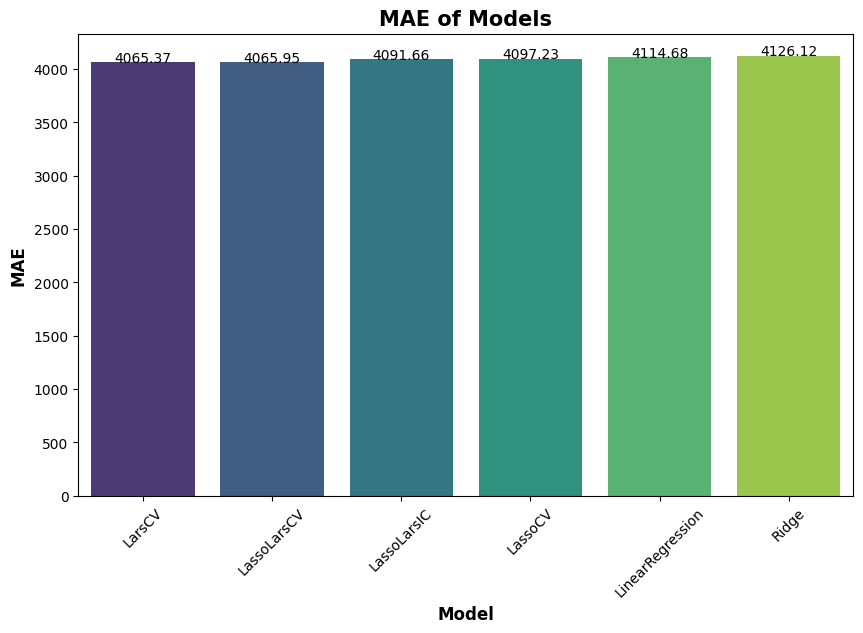

In [96]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MAE', data=model_performance, palette='viridis')
plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.ylabel('MAE', fontsize=12, fontweight='bold')
plt.title('MAE of Models', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
for i in range(model_performance.shape[0]):
    plt.text(i, model_performance['MAE'][i], round(model_performance['MAE'][i], 2), ha='center')

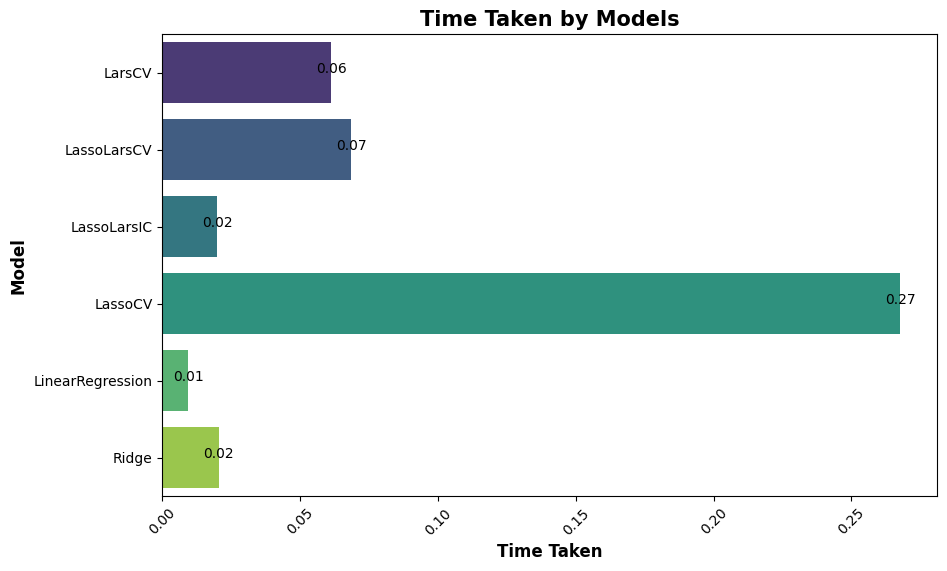

In [97]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Time Taken',y = 'Model' , data=model_performance, palette='viridis')
plt.xlabel('Time Taken', fontsize=12, fontweight='bold')
plt.ylabel('Model', fontsize=12, fontweight='bold')
plt.title('Time Taken by Models', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
for i in range(model_performance.shape[0]):
    plt.text(model_performance['Time Taken'][i], i, round(model_performance['Time Taken'][i], 2), ha='center')


## BEST MODEL(LarsCV) 

In [98]:
from sklearn.linear_model import LarsCV

model = LarsCV()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'R2 Score: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')


R2 Score: 0.9528294361457001
Mean Squared Error: 61251854.53773137
Mean Absolute Error: 4065.365244175115
Root Mean Squared Error: 7826.35640242197


**cross validation on the Training set of the Best Model**


In [55]:
from  sklearn.model_selection import cross_val_score, KFold

cross_val_score:  [0.9444046  0.97061833 0.9394075  0.94425966 0.95928354 0.96718811
 0.96726469 0.96569384 0.94819577 0.94585448]
Avg R2 Score:  0.9552170514404714


Text(0.5, 1.0, 'R2 Score of K-Fold Validation(Training set) for LarsCV Model')

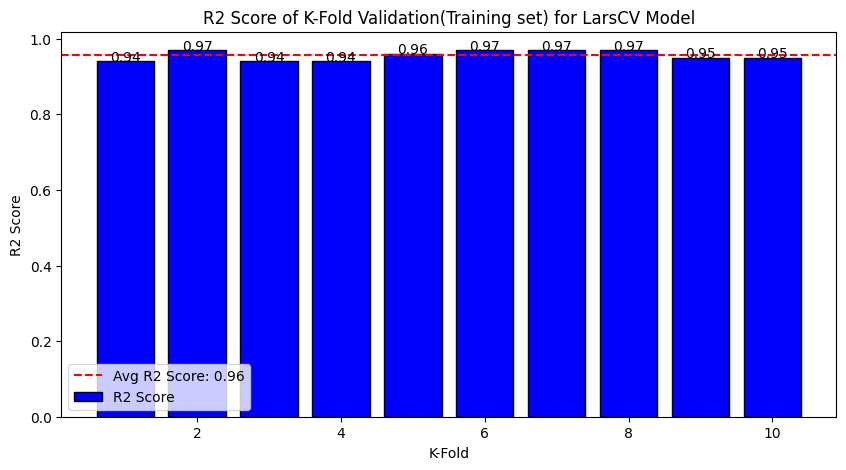

In [101]:
k = 10
kf = KFold(n_splits=k, random_state=None, shuffle=True)
model = LarsCV()
result = cross_val_score(model,  X_train, y_train, cv = kf,scoring='r2')
print('cross_val_score: ', result)
print("Avg R2 Score: ", result.mean())
result = [round(i, 2) for i in result]
plt.figure(figsize=(10, 5))
plt.bar(range(1, k + 1), result, color = 'blue', edgecolor = 'black')
plt.axhline(y = np.mean(result), color = 'red', linestyle = '--')
plt.legend([f'Avg R2 Score: {round(np.mean(result),2)}', 'R2 Score'])
for i in range(1, k + 1):
    plt.text(i, result[i - 1], result[i - 1], ha = 'center')
plt.xlabel('K-Fold')
plt.ylabel('R2 Score')
plt.title('R2 Score of K-Fold Validation(Training set) for LarsCV Model')


cross_val_score:  [ 8934.80044429  7429.414983    8500.51152232  6196.3621228
 10383.53214284  7917.34597718  6099.94546003  6531.27742622
 10668.62974333  5763.17734099]
Avg RMSE Score:  7842.499716298322


Text(0.5, 1.0, 'RMSE Score of K-Fold Validation(Training set) for LarsCV Model')

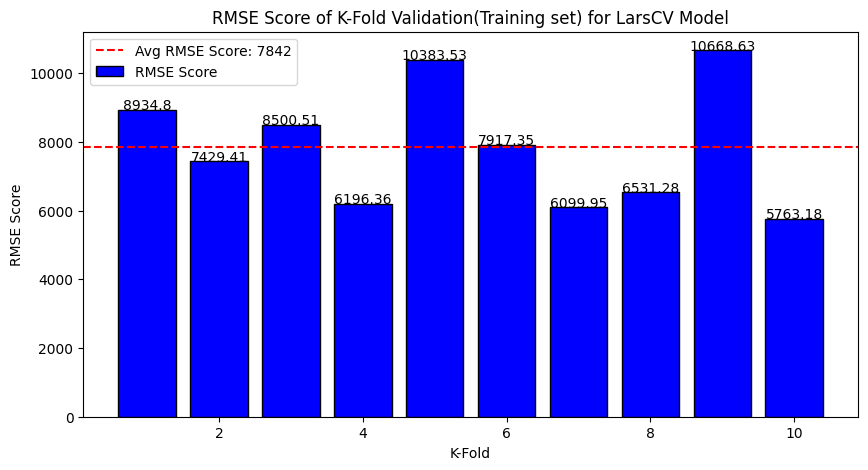

In [102]:
k = 10
kf = KFold(n_splits=k, random_state=None, shuffle=True)
model = LarsCV()
result = cross_val_score(model,  X_train, y_train, cv = kf,scoring='neg_root_mean_squared_error')
result = -result
print('cross_val_score: ', result)
print("Avg RMSE Score: ", result.mean())
result = [round(i, 2) for i in result]
plt.figure(figsize=(10, 5))
plt.bar(range(1, k + 1), result, color = 'blue', edgecolor = 'black')
plt.axhline(y = np.mean(result), color = 'red', linestyle = '--')
plt.legend([f'Avg RMSE Score: {round(np.mean(result))}', 'RMSE Score'], loc = 'upper left')
for i in range(1, k + 1):
    plt.text(i, result[i - 1], result[i - 1], ha = 'center')
plt.xlabel('K-Fold')
plt.ylabel('RMSE Score')
plt.title('RMSE Score of K-Fold Validation(Training set) for LarsCV Model')


## PIPELINE FOR THE BEST MODEL

In [103]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()), ('model', LarsCV())])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'R2 Score: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')



R2 Score: 0.9528324209830598
Mean Squared Error: 61247978.67090196
Mean Absolute Error: 4064.4131694395796
Root Mean Squared Error: 7826.1087822047275


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2470 entries, 0 to 2469
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FIRST NAME        2470 non-null   object        
 1   LAST NAME         2470 non-null   object        
 2   SEX               2470 non-null   object        
 3   DOJ               2470 non-null   datetime64[ns]
 4   CURRENT DATE      2470 non-null   datetime64[ns]
 5   DESIGNATION       2470 non-null   object        
 6   AGE               2470 non-null   float64       
 7   SALARY            2470 non-null   int64         
 8   UNIT              2470 non-null   object        
 9   LEAVES USED       2470 non-null   float64       
 10  LEAVES REMAINING  2470 non-null   float64       
 11  RATINGS           2470 non-null   float64       
 12  PAST EXP          2470 non-null   int64         
dtypes: datetime64[ns](2), float64(4), int64(2), object(5)
memory usage: 251.0+ KB


## FINDING THE IMPORTANT FEATURES

In [219]:
def dataframe(df_new):
    if 'DOJ' in df_new.columns:
            df_new['DOJ'] = pd.to_datetime(df_new['DOJ'])
            df_new['DOJ_YEAR'] = df_new['DOJ'].dt.year
            df_new['DOJ_MONTH'] = df_new['DOJ'].dt.month
            df_new['DOJ_DAY'] = df_new['DOJ'].dt.day
            df_new['DOJ_HOUR'] = df_new['DOJ'].dt.hour
            df_new['DOJ_MINUTE'] = df_new['DOJ'].dt.minute
            df_new['DOJ_SECOND'] = df_new['DOJ'].dt.second
            df_new = df_new.drop(['DOJ'], axis=1)
            df_new[['DOJ_YEAR', 'DOJ_MONTH', 'DOJ_DAY', 'DOJ_HOUR', 'DOJ_MINUTE', 'DOJ_SECOND']] = df_new[['DOJ_YEAR', 'DOJ_MONTH', 'DOJ_DAY', 'DOJ_HOUR', 'DOJ_MINUTE', 'DOJ_SECOND']].astype('int64')

    if 'CURRENT DATE' in df_new.columns:
            df_new['CURRENT DATE'] = pd.to_datetime(df_new['CURRENT DATE'])
            df_new['CURRENT DATE_YEAR'] = df_new['CURRENT DATE'].dt.year
            df_new['CURRENT DATE_MONTH'] = df_new['CURRENT DATE'].dt.month
            df_new['CURRENT DATE_DAY'] = df_new['CURRENT DATE'].dt.day
            df_new['CURRENT DATE_HOUR'] = df_new['CURRENT DATE'].dt.hour
            df_new['CURRENT DATE_MINUTE'] = df_new['CURRENT DATE'].dt.minute
            df_new['CURRENT DATE_SECOND'] = df_new['CURRENT DATE'].dt.second
            df_new = df_new.drop(['CURRENT DATE'], axis=1)
            df_new[['CURRENT DATE_YEAR', 'CURRENT DATE_MONTH', 'CURRENT DATE_DAY', 'CURRENT DATE_HOUR', 'CURRENT DATE_MINUTE', 'CURRENT DATE_SECOND']] = df_new[['CURRENT DATE_YEAR', 'CURRENT DATE_MONTH', 'CURRENT DATE_DAY', 'CURRENT DATE_HOUR', 'CURRENT DATE_MINUTE', 'CURRENT DATE_SECOND']].astype('int64')
    return df_new

def dummy(df_new):
    df_new = pd.get_dummies(df_new,dtype='int64')
    return df_new


def important_features(df):
    dropped = []
    r2_total = []
    rmse_total = []
    mae_total = []
    mse_total = []
    df_new = df.drop(['FIRST NAME', 'LAST NAME','SALARY'], axis=1)
    for i in (df_new.columns):
        df_new = df_new.drop([i], axis=1)
        df_ = dataframe(df_new)
        df_ = dummy(df_)

        X = df_
        y = df['SALARY']

        scale = StandardScaler()
        X_scaled = scale.fit_transform(X)
        X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
        model = LarsCV()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2_total.append(round(r2, 2))
        mse_total.append(round(mse, 2))
        rmse_total.append(round(rmse, 2))
        mae_total.append(round(mae, 2))
        dropped.append(i)
        print(f'{i} dropped')

    df_final = pd.DataFrame({'Dropped': dropped, 'R2': r2_total, 'MSE': mse_total, 'RMSE': rmse_total, 'MAE': mae_total})
    return df_final

        
          

   
    
    

In [239]:
features = important_features(df)
features

SEX dropped
DOJ dropped
CURRENT DATE dropped
DESIGNATION dropped
AGE dropped
UNIT dropped
LEAVES USED dropped
LEAVES REMAINING dropped
RATINGS dropped
PAST EXP dropped


,Dropped,R2,MSE,RMSE,MAE
0,SEX,0.95,61251854.54,7826.36,4065.37
1,DOJ,0.95,61251854.54,7826.36,4065.37
2,CURRENT DATE,0.95,61251854.54,7826.36,4065.37
3,DESIGNATION,0.77,294731508.13,17167.75,10936.08
4,AGE,0.76,315407154.19,17759.71,11124.13
5,UNIT,0.76,313797685.05,17714.34,11144.85
6,LEAVES USED,0.76,313797685.05,17714.34,11144.85
7,LEAVES REMAINING,0.76,313438618.32,17704.20,11149.03
8,RATINGS,0.76,314154624.44,17724.41,11157.17
9,PAST EXP,0.16,1090357588.34,33020.56,17621.23


In [245]:
features.index = features['Dropped']
features = features.drop(['Dropped'], axis=1)
features.index

,R2,MSE,RMSE,MAE
Dropped,,,,
SEX,0.95,61251854.54,7826.36,4065.37
DOJ,0.95,61251854.54,7826.36,4065.37
CURRENT DATE,0.95,61251854.54,7826.36,4065.37
DESIGNATION,0.77,294731508.13,17167.75,10936.08
AGE,0.76,315407154.19,17759.71,11124.13
UNIT,0.76,313797685.05,17714.34,11144.85
LEAVES USED,0.76,313797685.05,17714.34,11144.85
LEAVES REMAINING,0.76,313438618.32,17704.20,11149.03
RATINGS,0.76,314154624.44,17724.41,11157.17


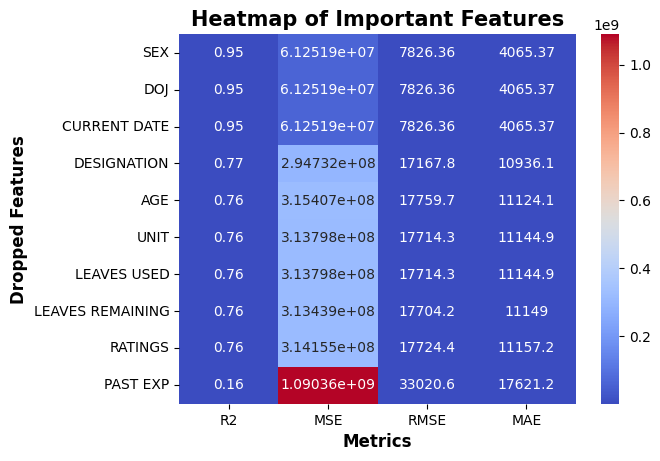

In [256]:
sns.heatmap( features, annot=True, cmap='coolwarm', fmt='g')
plt.title('Heatmap of Important Features', fontsize=15, fontweight='bold')
plt.xlabel('Metrics', fontsize=12, fontweight='bold')
plt.ylabel('Dropped Features', fontsize=12, fontweight='bold')
plt.show()


# SAVING MODEL With only the important features

In [74]:
df_final = df.drop(['FIRST NAME', 'LAST NAME','SEX','DOJ','CURRENT DATE'], axis=1)
df_final 

,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,Analyst,21.00,44570,Finance,24.00,6.00,2.00,0
1,Analyst,21.00,40955,Finance,23.00,7.00,3.00,0
2,Analyst,22.00,45550,IT,22.00,8.00,3.00,0
3,Analyst,22.00,40339,Marketing,19.00,11.00,5.00,0
4,Senior Analyst,28.00,63478,Operations,20.00,10.00,3.00,1
...,...,...,...,...,...,...,...,...
2465,Senior Manager,36.00,185977,Management,15.00,15.00,5.00,10
2466,Analyst,23.00,45758,IT,17.00,13.00,2.00,0
2467,Analyst,21.00,47315,Web,29.00,1.00,5.00,0
2468,Analyst,24.00,45172,Web,23.00,7.00,3.00,1


In [75]:
df_final_X = df_final.drop('SALARY', axis=1)
df_final_y = df_final['SALARY']


df_final_X = pd.get_dummies(df_final_X,dtype='int64')
df_final_X


,AGE,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,DESIGNATION_Analyst,DESIGNATION_Associate,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior Analyst,DESIGNATION_Senior Manager,UNIT_Finance,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web
0,21.00,24.00,6.00,2.00,0,1,0,0,0,0,0,1,0,0,0,0,0
1,21.00,23.00,7.00,3.00,0,1,0,0,0,0,0,1,0,0,0,0,0
2,22.00,22.00,8.00,3.00,0,1,0,0,0,0,0,0,1,0,0,0,0
3,22.00,19.00,11.00,5.00,0,1,0,0,0,0,0,0,0,0,1,0,0
4,28.00,20.00,10.00,3.00,1,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2465,36.00,15.00,15.00,5.00,10,0,0,0,0,0,1,0,0,1,0,0,0
2466,23.00,17.00,13.00,2.00,0,1,0,0,0,0,0,0,1,0,0,0,0
2467,21.00,29.00,1.00,5.00,0,1,0,0,0,0,0,0,0,0,0,0,1
2468,24.00,23.00,7.00,3.00,1,1,0,0,0,0,0,0,0,0,0,0,1


In [76]:
scale = StandardScaler()
df_final_X_scaled = scale.fit_transform(df_final_X)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scale, f)
df_final_X_scaled = pd.DataFrame(df_final_X_scaled, columns=df_final_X.columns)
df_final_X_scaled

,AGE,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,DESIGNATION_Analyst,DESIGNATION_Associate,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior Analyst,DESIGNATION_Senior Manager,UNIT_Finance,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web
0,-0.95,0.33,-0.33,-1.33,-0.58,0.58,-0.26,-0.11,-0.18,-0.37,-0.16,2.22,-0.46,-0.44,-0.45,-0.45,-0.44
1,-0.95,0.11,-0.11,-0.43,-0.58,0.58,-0.26,-0.11,-0.18,-0.37,-0.16,2.22,-0.46,-0.44,-0.45,-0.45,-0.44
2,-0.70,-0.11,0.11,-0.43,-0.58,0.58,-0.26,-0.11,-0.18,-0.37,-0.16,-0.45,2.16,-0.44,-0.45,-0.45,-0.44
3,-0.70,-0.76,0.76,1.36,-0.58,0.58,-0.26,-0.11,-0.18,-0.37,-0.16,-0.45,-0.46,-0.44,2.24,-0.45,-0.44
4,0.84,-0.54,0.54,-0.43,-0.21,-1.72,-0.26,-0.11,-0.18,2.68,-0.16,-0.45,-0.46,-0.44,-0.45,2.23,-0.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2465,2.88,-1.63,1.63,1.36,3.12,-1.72,-0.26,-0.11,-0.18,-0.37,6.34,-0.45,-0.46,2.29,-0.45,-0.45,-0.44
2466,-0.44,-1.19,1.19,-1.33,-0.58,0.58,-0.26,-0.11,-0.18,-0.37,-0.16,-0.45,2.16,-0.44,-0.45,-0.45,-0.44
2467,-0.95,1.42,-1.42,1.36,-0.58,0.58,-0.26,-0.11,-0.18,-0.37,-0.16,-0.45,-0.46,-0.44,-0.45,-0.45,2.29
2468,-0.19,0.11,-0.11,-0.43,-0.21,0.58,-0.26,-0.11,-0.18,-0.37,-0.16,-0.45,-0.46,-0.44,-0.45,-0.45,2.29


In [77]:
X_train, X_test, y_train, y_test = train_test_split(df_final_X_scaled, df_final_y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1976, 17), (494, 17), (1976,), (494,))

In [105]:
model = LarsCV()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'R2 Score: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
pickle.dump(model, open('model_Lcv.pkl','wb'))
print('Model Saved')


R2 Score: 0.9528294361457001
Mean Squared Error: 61251854.53773137
Mean Absolute Error: 4065.365244175115
Root Mean Squared Error: 7826.35640242197
Model Saved


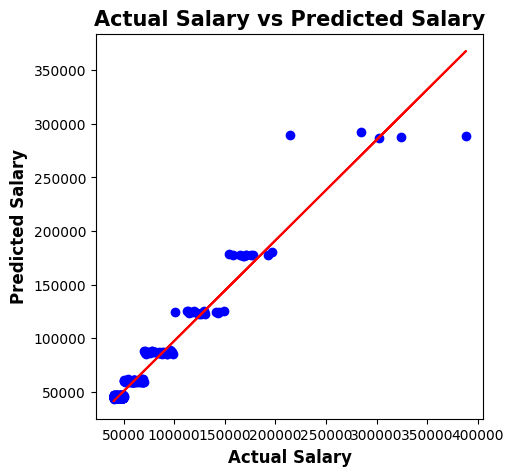

In [107]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Salary', fontsize=12, fontweight='bold')
plt.ylabel('Predicted Salary', fontsize=12, fontweight='bold')
plt.title('Actual Salary vs Predicted Salary', fontsize=15, fontweight='bold')
p = np.polyfit(y_test, y_pred, 1)
z = np.poly1d(p)
plt.plot(y_test, z(y_test), color='red')
plt.show()

## DEPLOYING THE APP

**FLASK**

In [ ]:
from flask import Flask, request, render_template
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler

# Load the model
model = pickle.load(open('Model/model_Lcv.pkl', 'rb'))

with open('Model/scaler.pkl', 'rb') as f:
    scale = pickle.load(f)

app = Flask(__name__)

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/submit', methods=['POST'])
def submit():
    input_data1 = request.form['input_data1']
    input_data2 = request.form['input_data2']
    input_data3 = request.form['input_data3']
    input_data4 = request.form['input_data4']
    input_data5 = request.form['input_data5']
    input_data6 = int(request.form['input_data6'])
    input_data7 = int(request.form['input_data7'])
    
    if input_data1 == '' or input_data2 == '' or input_data3 == '' or input_data4 == '' or input_data5 == '' or input_data6 == '' or input_data7 == '':
        return "Please fill in all fields", 400
    Age =float(input_data1)
    leave_used = float(input_data2)
    leave_remaining = float(input_data3)
    rating = float(input_data4)
    past_exp =float(input_data5)
    DESIGNATION_Analyst,DESIGNATION_Associate,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior_Analyst,DESIGNATION_Senior_Manager = 0,0,0,0,0,0
    UNIT_Finance,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web = 0,0,0,0,0,0
    if input_data6 == 1:
        DESIGNATION_Analyst,DESIGNATION_Associate,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior_Analyst,DESIGNATION_Senior_Manager =1,0,0,0,0,0
    elif input_data6 == 2:
        DESIGNATION_Analyst,DESIGNATION_Associate,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior_Analyst,DESIGNATION_Senior_Manager =0,1,0,0,0,0
    elif input_data6 == 3:
        DESIGNATION_Analyst,DESIGNATION_Associate,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior_Analyst,DESIGNATION_Senior_Manager =0,0,1,0,0,0
    elif input_data6 == 4:
        DESIGNATION_Analyst,DESIGNATION_Associate,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior_Analyst,DESIGNATION_Senior_Manager =0,0,0,1,0,0
    elif input_data6 == 5:
        DESIGNATION_Analyst,DESIGNATION_Associate,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior_Analyst,DESIGNATION_Senior_Manager =0,0,0,0,1,0
    elif input_data6 == 6:
        DESIGNATION_Analyst,DESIGNATION_Associate,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior_Analyst,DESIGNATION_Senior_Manager =0,0,0,0,0,1

    

    if input_data7 == 1:
        UNIT_Finance,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web = 1,0,0,0,0,0
    elif input_data7 == 2:
        UNIT_Finance,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web = 0,1,0,0,0,0
    elif input_data7 == 3:
        UNIT_Finance,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web = 0,0,1,0,0,0
    elif input_data7 == 4:
        UNIT_Finance,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web = 0,0,0,1,0,0
    elif input_data7 == 5:
        UNIT_Finance,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web = 0,0,0,0,1,0
    elif input_data7 == 6:
        UNIT_Finance,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web = 0,0,0,0,0,1
    
    input_data1 = pd.DataFrame([[Age,leave_used,leave_remaining,rating,past_exp,DESIGNATION_Analyst,DESIGNATION_Associate,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior_Analyst,DESIGNATION_Senior_Manager,UNIT_Finance,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web]])
    input_data1.columns = [ 'AGE','LEAVES USED','LEAVES REMAINING','RATINGS','PAST EXP','DESIGNATION_Analyst','DESIGNATION_Associate','DESIGNATION_Director','DESIGNATION_Manager','DESIGNATION_Senior Analyst','DESIGNATION_Senior Manager','UNIT_Finance','UNIT_IT','UNIT_Management','UNIT_Marketing','UNIT_Operations','UNIT_Web']
    
    input_data = scale.transform(input_data1)
    input_data = pd.DataFrame(input_data, columns= input_data1.columns) 
    
    print(input_data1)
    prediction = model.predict(input_data)
    prediction =round (prediction[0],2)

   
    
    return f"The Staff will be paid: {prediction}", 200

if __name__ == '__main__':
    app.run(debug=True)


**HTML**

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Input Form</title>
</head>
<body>
    <h1>Enter Your Datas</h1>
    <form action="/submit" method="POST">
        <label for="input_data1">AGE:</label>
        <input type="number" id="input_data1" name="input_data1" required><br>
        <label for="input_data2">LEAVES USED:</label>
        <input type="number" id="input_data2" name="input_data2" required><br>
        <label for="input_data3">LEAVES REMAINING:</label>
        <input type="number" id="input_data3" name="input_data3" required><br>
        <label for="input_dat4">RATINGS:</label>
        <input type="number" id="input_data4" name="input_data4" required><br>
        <label for="input_data5">PAST EXPERIENCE:</label>
        <input type="number" id="input_data5" name="input_data5" required><br>
        <label for="input_data6">DESIGNATION:</label>
        <input type="radio" id="input_data6" name="input_data6" value="1" required>Analyst
        <input type="radio" id="input_data6" name="input_data6" value="2" required>Associate
        <input type="radio" id="input_data6" name="input_data6" value="3" required>Director
        <input type="radio" id="input_data6" name="input_data6" value="4" required>Manager
        <input type="radio" id="input_data6" name="input_data6" value="5" required>Senior Analyst
        <input type="radio" id="input_data6" name="input_data6" value="6" required>Senior Manager<br>
        <label for="input_data7">UNIT:</label>
        <input type="radio" id="input_data7" name="input_data7" value="1" required>Finance
        <input type="radio" id="input_data7" name="input_data7" value="2" required>IT
        <input type="radio" id="input_data7" name="input_data7" value="3" required>Management
        <input type="radio" id="input_data7" name="input_data7" value="4" required>Marketing
        <input type="radio" id="input_data7" name="input_data7" value="5" required>Operations
        <input type="radio" id="input_data7" name="input_data7" value="6" required>Web <br>
        <input type="submit" value="Submit">
    </form>
</body>
</html>
